## K-means Clustering
In this notebook, we will cover the following concepts with the help of a business use case:
- K-means clustering
- Deciding optimal number of clusters:
    Elbow method


**Problem Statement:**

Lithionpower is the largest provider of electric vehicle batteries.
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery
from the company. Lithionpower has a variable pricing model based on the driver's driving history. Battery life depends on factors like
overspeeding, distance driven per day, and so on.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the dataset
df = pd.read_csv("driver-data.csv")

In [4]:
#check the dataset
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
#Check number of columns and rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
#Finding count of null values
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

Text(0, 0.5, 'mean_over_speed_perc')

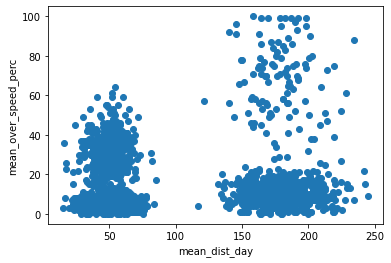

In [8]:
#plot the Scatter plot
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

### Apply K-means Clustering algorithm

In [9]:
from sklearn.cluster import KMeans

In [10]:
df_analyze = df.drop('id',axis=1)

In [11]:
# Run the algorithm with k=3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_analyze)
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
#Add the Predicted Clusters Column to the Dataset

df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
2082,3423311050,45.86,6,1
198,3423311887,48.83,39,1
98,3423311257,50.41,43,1
2196,3423312877,45.24,3,1
3471,3423311603,171.15,5,0


In [13]:
#cluster centers
print(km.cluster_centers_)

unique, counts = np.unique(km.labels_, return_counts=True)
print(dict(zip(unique, counts)))

[[180.34311782  10.52011494]
 [ 50.04763437   8.82875   ]
 [177.83509615  70.28846154]]
{0: 696, 1: 3200, 2: 104}


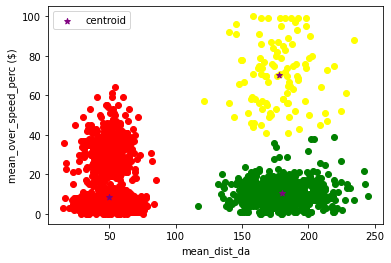

In [14]:
#plot the Cluster with their centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

### Elbow method
It's a popular technique that involves running k-means clustering for a set of k clusters (let's say 1 to 10) and calculating the sum of
squared distances from each point to its assigned center (inertia)

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

In [16]:
sse

[12184626.129627973,
 1316420.850947719,
 992634.0606702473,
 719601.1096991897,
 534638.1242580614,
 372861.1277767232,
 319787.44381599315,
 276961.4824710089,
 252685.60981191052]

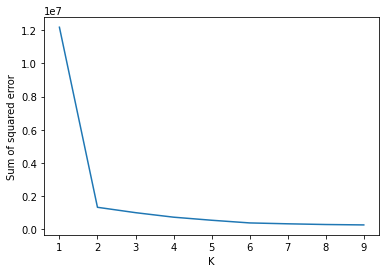

In [17]:
#plot the elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**The point of inflection in the elbow plot is 2, so we know now that the optimal number of the clusters for the data points is 2**

In [18]:
#Run the algorithm with k=2
km2 = KMeans(n_clusters=2)
y_predicted = km2.fit_predict(df_analyze)
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
#cluster centers
unique, counts = np.unique(km2.labels_, return_counts=True)
print(km2.cluster_centers_)
print(dict(zip(unique, counts)))

[[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]
{0: 3200, 1: 800}


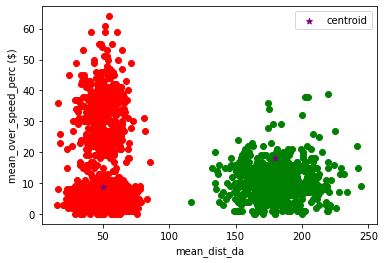

In [20]:
#plot the Cluster with their centroids 2
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()